# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição dos dados

![](https://i.pinimg.com/originals/b4/be/12/b4be1247b4b9cc74f96bf8bc67d01d00.gif)

O conjunto de dados de consumo de combustível de veículos ("MPG" - _Miles per Gallon_) contém informações detalhadas sobre características de carros, como o consumo de combustível e especificações técnicas dos modelos. A variável `mpg` representa a eficiência de combustível em milhas por galão, enquanto `cylinders` e `displacement` indicam o número de cilindros e o volume do motor, respectivamente. Outras variáveis, como `horsepower` (potência do motor) e `weight` (peso do veículo), também fornecem informações essenciais sobre o desempenho e a estrutura dos veículos.

O conjunto de dados abrange veículos fabricados em diferentes anos (`model_year`) e regiões (`origin`), com categorias distintas para EUA, Europa e Japão. Adicionalmente, a variável `acceleration` mede o tempo necessário para que um veículo vá de 0 a 60 mph, e a variável `name` identifica o modelo específico do carro. Essas variáveis são majoritariamente quantitativas e fornecem uma base rica para análises sobre os fatores que impactam o consumo de combustível e o desempenho de veículos ao longo dos anos.


### 2.1. Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Consumo de combustível (MPG = Milhas por galão),quantitativa,discreta
1,cylinders,Número de cilindros do motor.,quantitativa,discreta
2,displacement,Volume deslocado pelo motor em polegadas cúbicas.,quantitativa,contínua
3,horsepower,Potência do motor medida em cavalos de força (...,quantitativa,contínua
4,weight,Peso do veículo em libras.,quantitativa,contínua
5,acceleration,Tempo em segundos que o veículo leva para ir d...,quantitativa,contínua
6,model_year,Ano de fabricação do modelo.,qualitativa,ordinal
7,origin,"Origem do veículo (1: EUA, 2: Europa, 3: Japão).",qualitativa,nominal
8,name,Nome completo do modelo do veículo.,inútil,-


### 2.2. Modificações e criação de novas variáveis

 - A partir de observações iniciais no conjunto de dados, notamos que a variável `name` contém a marca do veículo, desse modo, podemos criar a variável `brand`, que é derivada da variável `name` a partir do código a seguir.
 - Para facilitar a análise, converteremos todas as variáveis para o sistema internacional de medidas (variáveis `displacement`) (exceto o `horsepower`, pois hp é uma medida comum nessa área). Importante salientar que também modificaremos o dicionário;

In [4]:
# Criação da variável "brand"
correcoes = {
    'chevy': 'chevrolet',
    'toyouta': 'toyota',
    'maxda': 'mazda',
    'chevroelt': 'chevrolet',
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'capri': 'ford',  # Remover ou definir como nulo, pois "capri" é um modelo, não uma marca
    'hi': None,  # Remover ou definir como nulo, pois "hi" não é uma marca
    
}
df["brand"] = df.name.str.split(" ", expand=True)[0].replace(correcoes)
# Converter variáveis para o SI
df = (
    df
    .assign(
        km_per_l = df['mpg'] * 0.425144, # MPG para km/L
        displacement_L = df['displacement'] * 0.0163871, # Cilindradas de polegadas cúbicas para litros
        weight_kg = df['weight'] * 0.453592, # Peso de libras para quilogramas
    )
    .drop(columns=['mpg', 'displacement', 'weight'])
)

Com isso, podemos modificar também o dicionário de dados, adicionando as modificações.

In [5]:
novas_variaveis = [
    {
        'variavel': 'brand',
        'descricao': 'Marca do veículo.',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel': 'km_per_l',
        'descricao': 'Consumo de combustível em quilômetros por litro (km/L).',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'displacement_L',
        'descricao': 'Volume deslocado pelo motor em litros.',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'weight_kg', 
        'descricao': 'Peso do veículo em quilogramas (kg).',
        'tipo': 'quantitativa', 
        'subtipo': 'contínua'
    }
]
variaveis_originais = list(set(df.columns.to_list()) & set(dicionario.variavel.unique()))

In [6]:
dicionario = pd.concat([
    dicionario.query('variavel in @variaveis_originais'),
    pd.DataFrame(novas_variaveis)
])
dicionario

,variavel,descricao,tipo,subtipo
1,cylinders,Número de cilindros do motor.,quantitativa,discreta
3,horsepower,Potência do motor medida em cavalos de força (...,quantitativa,contínua
5,acceleration,Tempo em segundos que o veículo leva para ir d...,quantitativa,contínua
6,model_year,Ano de fabricação do modelo.,qualitativa,ordinal
7,origin,"Origem do veículo (1: EUA, 2: Europa, 3: Japão).",qualitativa,nominal
8,name,Nome completo do modelo do veículo.,inútil,-
0,brand,Marca do veículo.,qualitativa,nominal
1,km_per_l,Consumo de combustível em quilômetros por litr...,quantitativa,contínua
2,displacement_L,Volume deslocado pelo motor em litros.,quantitativa,contínua
3,weight_kg,Peso do veículo em quilogramas (kg).,quantitativa,contínua


---

É importante notar que agora a nossa variável alvo é `km_per_l`.

---

In [7]:
quantidade_qualitativa = dicionario.query("tipo == 'qualitativa'").shape[0]
quantidade_quantitativa = dicionario.query("tipo == 'quantitativa'").shape[0]

quantidade_qualitativa_nominal = dicionario.query("subtipo == 'nominal'").shape[0]
quantidade_qualitativa_ordinal = dicionario.query("subtipo == 'ordinal'").shape[0]

quantidade_quantitativa_continua = dicionario.query("subtipo == 'contínua'").shape[0]
quantidade_quantitativa_discreta = dicionario.query("subtipo == 'discreta'").shape[0]

display(Markdown(f"""
---
 - São {dicionario.shape[0]} variáveis: {quantidade_qualitativa} qualitativas e {quantidade_quantitativa} quantitativas e 1 variável inútil;
    - Qualitativas: {quantidade_qualitativa_nominal} nominais e {quantidade_qualitativa_ordinal} ordinais;
    - Quantitativas: {quantidade_quantitativa_continua} contínuas e {quantidade_quantitativa_discreta} discretas;
---
"""))


---
 - São 10 variáveis: 3 qualitativas e 6 quantitativas e 1 variável inútil;
    - Qualitativas: 2 nominais e 1 ordinais;
    - Quantitativas: 5 contínuas e 1 discretas;
---


## 3. Perguntas de partida e hipóteses
 - Existem dados faltantes, se sim quantos e em quais variáveis?
 - Qual a distribuição dos dados (variável por variável)?
 - Qual a relação entre as variáveis ligadas ao motor (`cylinders`, `displacement_L`, `horsepower`) e o consumo de combustível (`km_per_l`)?
 - Existe alguma relação entre o ano de fabricação (`model_year`), peso do carro (`weight_kg`) e o consumo de combustível (`km_per_l`)?
 - Quais países e marcas criam carros que consomem mais combustível?
 

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [8]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

horsepower    6
brand         1
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['horsepower', 'brand']`contém valores faltantes. Além disso sabemos que temos `7` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [9]:
df.describe(include='all')

,cylinders,horsepower,acceleration,model_year,origin,name,brand,km_per_l,displacement_L,weight_kg
count,391.000000,391.000000,391.000000,391.000000,391,391,391,391.000000,391.000000,391.000000
unique,NaN,NaN,NaN,NaN,3,300,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,usa,amc matador,ford,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,244,5,49,NaN,NaN,NaN
mean,5.465473,104.242967,15.533760,75.994885,NaN,NaN,NaN,9.983599,3.181256,1348.573099
std,1.703152,38.278196,2.758323,3.675975,NaN,NaN,NaN,3.307879,1.714593,383.660073
min,3.000000,46.000000,8.000000,70.000000,NaN,NaN,NaN,4.251440,1.114323,731.643896
25%,4.000000,75.000000,13.750000,73.000000,NaN,NaN,NaN,7.333734,1.720646,1009.015404
50%,4.000000,93.000000,15.500000,76.000000,NaN,NaN,NaN,9.778312,2.474452,1270.057600
75%,8.000000,125.000000,17.000000,79.000000,NaN,NaN,NaN,12.329176,4.334388,1637.920712


---
 - Existem três possíveis países fabricantes nesse conjunto de dados;
 - A marca mais frequente é a Ford;
 - O consumo médio (`km_per_l`) é de 9.98, com um mínimo de 4.25 e máximo de 19.81, aproximadamente;
 - O número de cilíndros varia entre [8, 4, 6, 3, 5];
 - O carro mais leve pesa 731.64kg, o mais pesado 2331.46kg e o peso médio é de 1348.57kg.
---

##### Distribuição das variáveis qualitativas

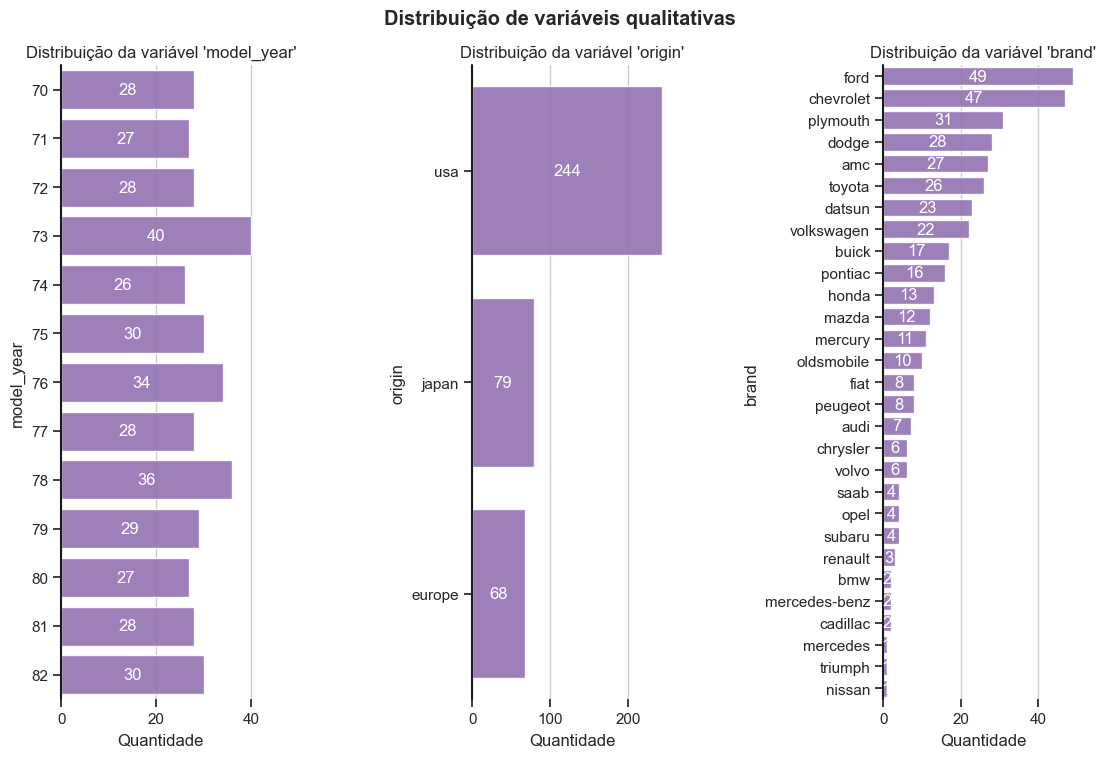

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = None
    if dicionario.query('variavel == @variavel').subtipo.to_list()[0] == 'nominal':
        order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        y=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order,
        orient='h'
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axvline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_xlabel('Quantidade')
    ax.grid(axis='x', linestyle='-')
plt.show()

---
 - A maioria dos carros são da Ford;
 - O maior número de carros da análise é fabricado nos Estados Unidos da América;
 - A distribuição dos anos é balanceada, tendo maior número de instâncias nos anos 73 e 78.
---

#### Distribuição das variáveis quantitativas

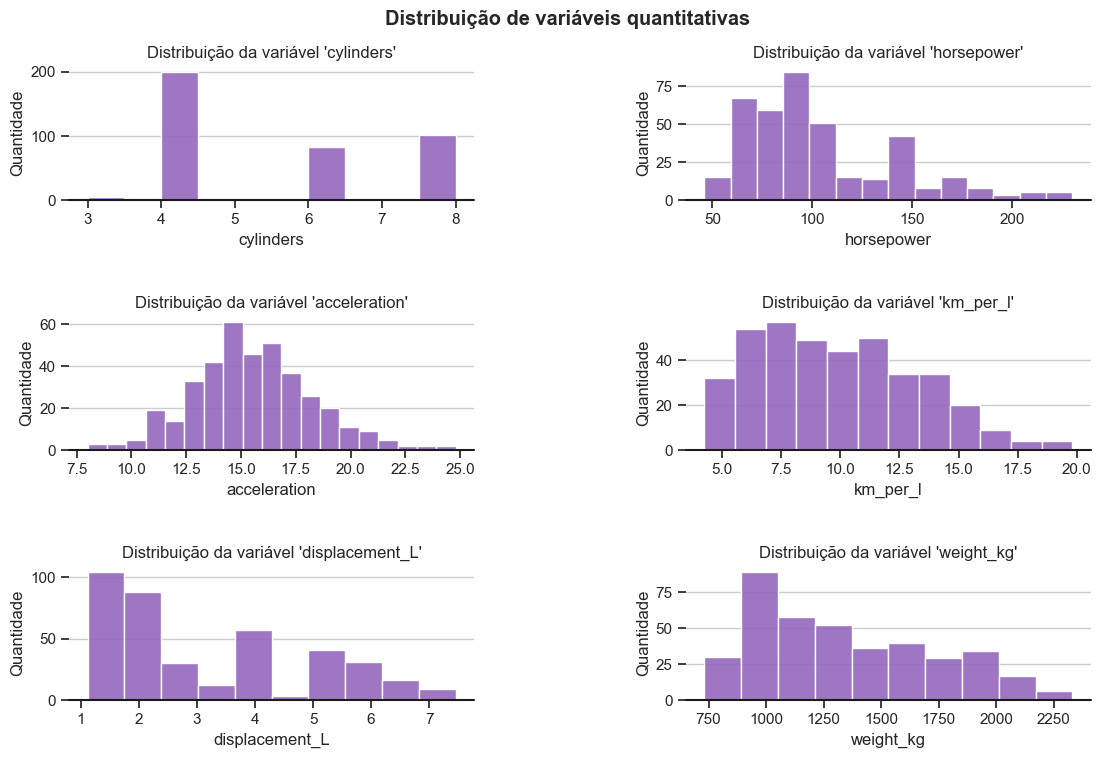

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

---
A partir das visualizações acima podemos dizer que:
 - A maior parte dos carros tem 4 cilíndros
 - A potência dos carros varia entre 50 e pouco menos de 250, mas a maior parte instâncias varia em torno de 100 cavalos potência.
 - A distribuição da aceleração se aproxima visualmente com uma normal, tendo uma média em torno de 15 e variando entre 7.5 e 25.
 - A distribuição da quantidade de kilômetros por litro é enviezada para direita, tendo moda próximop de 7.5;
 - A maior parte dos carros desloca menos que 1L por vez;
 - os pesos variam entre 750 até 2250, sendo uma distribuição enviezada para direita, com média próximo a 1000kg
---

### Qual a relação entre as variáveis ligadas ao motor e o consumo de combustível?

As variáveis logadas ao motor são `cylinders`, `displacement_L`, `horsepower`.

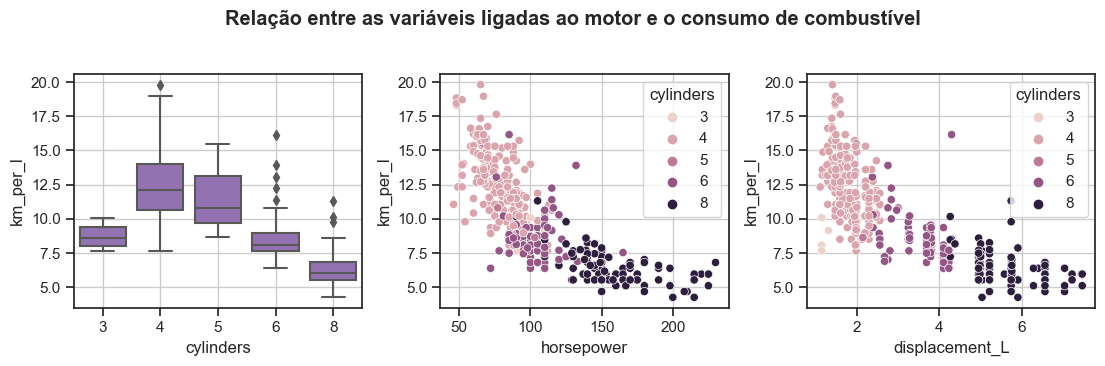

In [12]:
variaveis_motor = ['cylinders', 'displacement_L', 'horsepower']
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre as variáveis ligadas ao motor e o consumo de combustível', fontweight='bold')
for i, variavel in enumerate(dicionario.query("variavel in @variaveis_motor").variavel.to_list()):
    if dicionario.query('variavel == @variavel').subtipo.to_list()[0] == 'discreta':
        ax = sns.boxplot(
            y="km_per_l", 
            x=variavel, 
            color=colors[0],
            # hue=variavel, 
            data=df, 
            ax=axes.flatten()[i]
        )
    else:
        ax = sns.scatterplot(
            y="km_per_l", 
            x=variavel, 
            # hue="origin", 
            # size='cylinders',
            hue='cylinders',
            data=df, 
            ax=axes.flatten()[i],
        )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.grid(axis='x', linestyle='-')

    # ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
# fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---

A partir das visualizações acima podemos dizer que:
 - Carros com menos cilindros (3 e 4) são mais eficientes em combustível; veículos com 8 cilindros são os menos eficientes.
 - Há uma correlação negativa entre potência (`horsepower`) e consumo de combustível; motores mais potentes tendem a ser menos eficientes.
 - Carros com maior deslocamento do motor (`displacement_L`) também mostram menor eficiência de combustível.
 - Veículos projetados para alto desempenho (mais potência e cilindrada) são menos econômicos em combustível.


###  Existe alguma relação entre o ano de fabricação (`model_year`), peso do carro (`weight_kg`) e o consumo de combustível (`km_per_l`)?

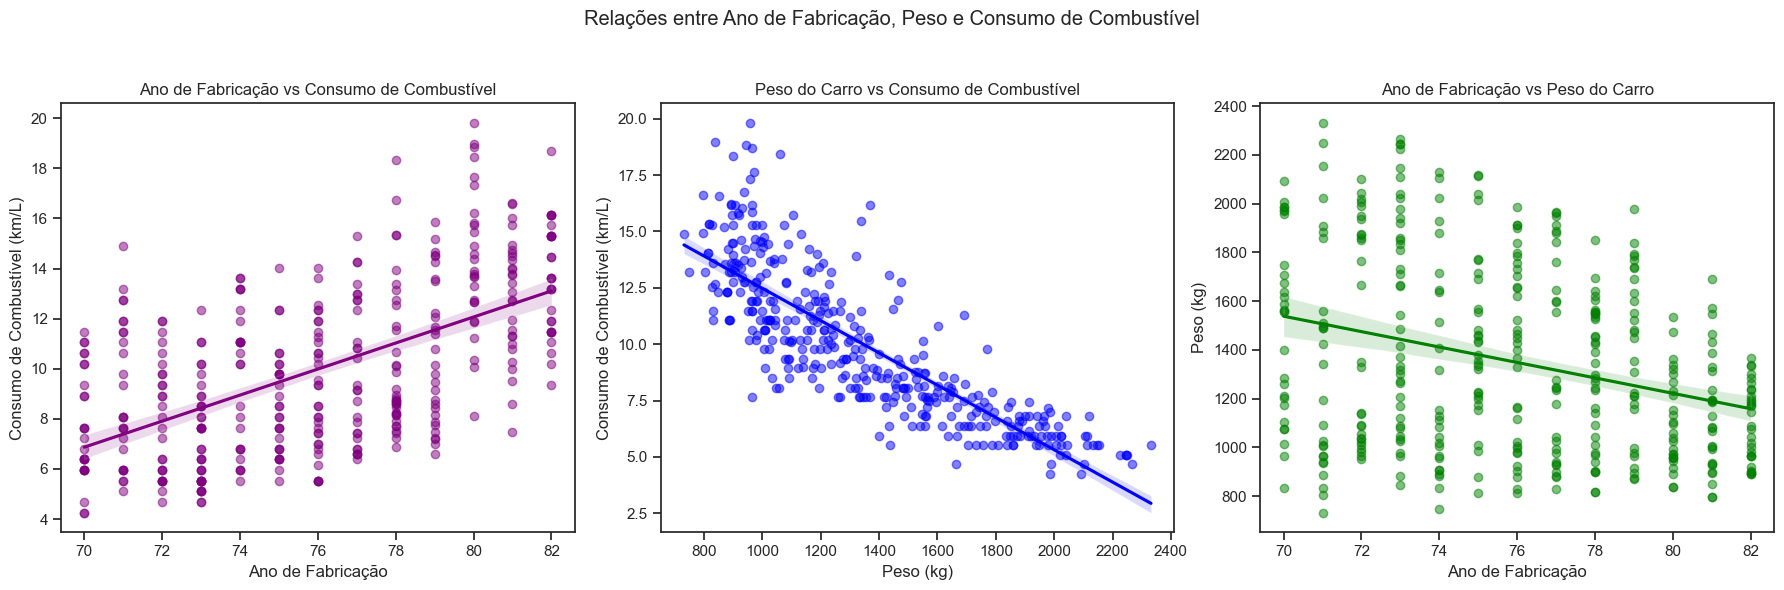

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Relações entre Ano de Fabricação, Peso e Consumo de Combustível")

# Gráfico 1: Relação entre ano de fabricação e consumo de combustível
sns.regplot(data=df, x='model_year', y='km_per_l', ax=axes[0], scatter_kws={'alpha':0.5}, color='purple')
axes[0].set_title("Ano de Fabricação vs Consumo de Combustível")
axes[0].set_xlabel("Ano de Fabricação")
axes[0].set_ylabel("Consumo de Combustível (km/L)")

# Gráfico 2: Relação entre peso e consumo de combustível
sns.regplot(data=df, x='weight_kg', y='km_per_l', ax=axes[1], scatter_kws={'alpha':0.5}, color='blue')
axes[1].set_title("Peso do Carro vs Consumo de Combustível")
axes[1].set_xlabel("Peso (kg)")
axes[1].set_ylabel("Consumo de Combustível (km/L)")

# Gráfico 3: Relação entre ano de fabricação e peso
sns.regplot(data=df, x='model_year', y='weight_kg', ax=axes[2], scatter_kws={'alpha':0.5}, color='green')
axes[2].set_title("Ano de Fabricação vs Peso do Carro")
axes[2].set_xlabel("Ano de Fabricação")
axes[2].set_ylabel("Peso (kg)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

---

A partir das visualizações acima podemos dizer que:
 - Existe uma tendência de aumento no consumo de combustível ao longo dos anos, sugerindo que carros mais modernos tendem a ser mais eficientes em combustível.
 - Há uma forte correlação negativa entre o peso do carro e o consumo de combustível, indicando que carros mais pesados geralmente têm menor eficiência de combustível.
 - A relação entre o ano de fabricação e o peso do carro mostra uma leve tendência de redução no peso ao longo do tempo, o que pode refletir avanços em design e materiais.
 - Os gráficos sugerem que, com o passar dos anos, houve um esforço para tornar os carros mais leves e mais eficientes em combustível.
 - A tendência de carros mais novos serem mais leves e mais econômicos em combustível sugere uma interação entre essas variáveis, onde melhorias tecnológicas podem estar influenciando ambos os fatores.

---


### Quais países e marcas criam carros que consomem mais combustível?

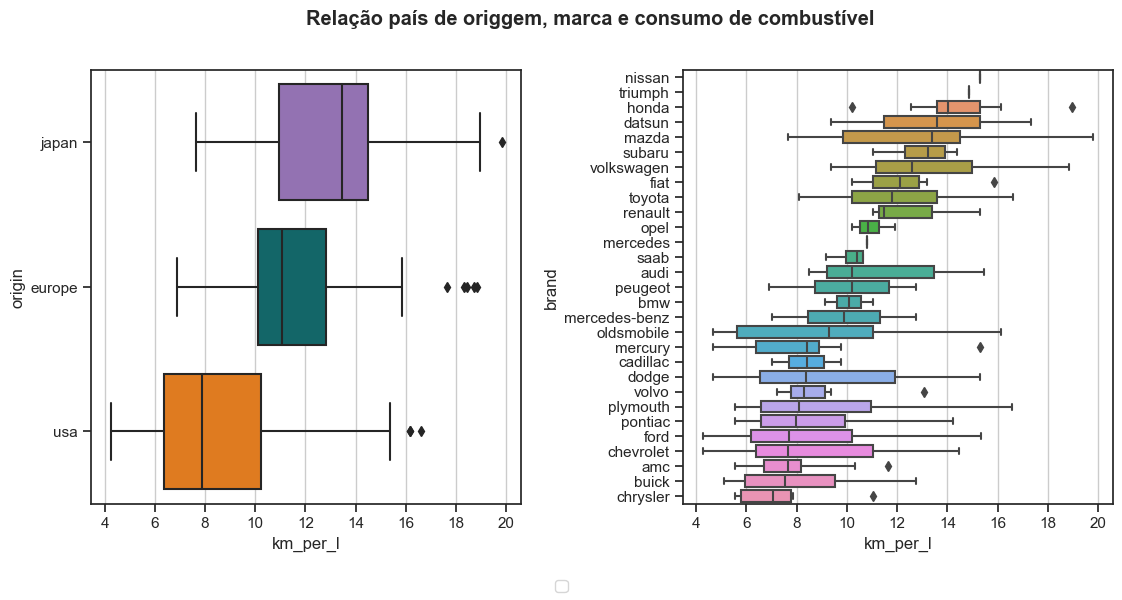

In [14]:
variaveis_motor = ['origin', 'brand']
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.tight_layout(pad=4, w_pad=7, h_pad=5)
fig.suptitle('Relação país de origgem, marca e consumo de combustível', fontweight='bold')
for i, variavel in enumerate(dicionario.query("variavel in @variaveis_motor").variavel.to_list()):
    order = df.groupby(variavel).km_per_l.agg(np.median).sort_values(ascending=False).index
    ax = sns.boxplot(
        x="km_per_l", 
        y=variavel, 
        # hue="origin", 
        data=df, 
        ax=axes.flatten()[i],
        order=order
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='x', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---
 - Marcas japonesas, como Nissan e Toyota, destacam-se pela maior economia de combustível, entre 10 e 15 km/l.
 - Marcas dos EUA, como Chrysler e Buick, têm eficiência menor (entre 6 e 10 km/l), refletindo a preferência por veículos maiores e mais potentes.
 - Marcas europeias, como Volkswagen e BMW, oferecem um equilíbrio entre economia e potência, com consumo médio entre 8 e 12 km/l.
 - Marcas como Ford e Chevrolet têm ampla gama de modelos, com variação significativa na eficiência de combustível.
 - Algumas marcas, como Volkswagen e Toyota, têm outliers, sugerindo modelos específicos com consumo fora do padrão típico da marca.
---

## 3. *Insights*

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:
 - A marca mais frequente é a Ford, com a maior parte dos carros fabricados nos Estados Unidos da América.
 - A maioria dos carros tem 4 cilindros, sendo esses geralmente mais eficientes em combustível. Carros com 8 cilindros são os menos eficientes.
 - O consumo médio de combustível é 9.98 km/L, com valores entre 4.25 e 19.81 km/L, indicando grande variação na eficiência dos modelos.
 - Carros com maior potência tendem a ser menos eficientes em combustível, com uma correlação negativa entre potência e consumo de combustível.
 - Veículos projetados para alto desempenho (maior potência e cilindrada) mostram menor eficiência de combustível.
 - Marcas japonesas, como Nissan e Toyota, destacam-se pela maior economia de combustível (entre 10 e 15 km/L), enquanto marcas dos EUA, como Chrysler e Buick, são menos eficientes (entre 6 e 10 km/L).
 - Existe uma tendência de aumento no consumo de combustível ao longo dos anos, sugerindo que carros mais modernos tendem a ser mais eficientes.
 - O peso médio dos carros é de 1348.57 kg, com uma correlação negativa entre peso e consumo, indicando que carros mais pesados tendem a ser menos eficientes.
 - A relação entre ano de fabricação e peso sugere uma leve redução no peso ao longo do tempo, possivelmente devido a avanços tecnológicos.
 - Algumas marcas apresentam outliers (como Volkswagen e Toyota), indicando modelos específicos com consumo de combustível fora do padrão típico da marca.

## 4. Observação

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.

## 5. Salvamento de dados e dicionário

In [15]:
df.to_csv("../data/processed/data.csv", index=False)
dicionario.to_csv("../data/external/new_dictionary.csv", index=False)